### Comparision of Best Models

#### Down Milling

**Random Forest only using Cutting Parameters**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
up_or_down = 'down' # or down
all_data = pd.read_csv('../../data/feature_set1/train_{}_Y.csv'.format(up_or_down))
all_data = all_data.drop(index=[48, 49, 51, 72, 91], axis=0).reset_index(drop=True)  # remove outliers
all_data.head()

Nr.  spindle_speed   ap     fz   Ra_down   vbs   clamp_t1     clamp_t2  \
0    1           8000  0.2  0.050  12.83250   800  23.664093   917.580527   
1    2           8000  0.2  0.065   6.47625  1040  28.025455  1817.287671   
2    3           8000  0.2  0.075   8.42100  1200  24.258964  2600.600669   
3    4           8000  0.2  0.100   6.81600  1600  23.584906  4141.970983   
4    5           8000  0.4  0.050  12.51250   800  43.182927  1232.354156   

    clamp_t3  clamp_t4  ...  robot_t4  robot_t5  robot_t6  robot_t7  robot_t8  \
0  38.393060     131.0  ...    1159.0     340.0 -0.164626  3.279446  1.164723   
1  50.951992     153.0  ...    1114.0     286.0 -0.152276  2.869851  1.125636   
2  56.380290     175.0  ...    1205.0     350.0  0.195294  2.681590  1.214723   
3  68.429443     212.0  ...    1206.0     438.0 -0.022681  2.818957  1.221912   
4  55.606742     132.0  ...    1147.0     275.0  0.136498  2.464138  1.154345   

   robot_t9   clamp_f1   clamp_f2   robot_f1   robot_f2  
0  1.162811  12.222404  19.191919  22.863227  14.646465  
1  1.123908  17.382572  21.717172  25.495338  31.313131  
2  1.212308  20.770490  21.717172  37.602301  31.313131  
3  1.217963  27.491432  21.717172  39.944840   5.050505  
4  1.152213  18.159337   9.595960  33.502295   6.060606  

[5 rows x 28 columns]

##### All Features without Hyperparametertuning

In [3]:
used_feature = ['spindle_speed', 'ap', 'fz', 'vbs',]

In [4]:
X = all_data[used_feature]
X = np.array(X)
Y = all_data['Ra_{}'.format(up_or_down)]
Y = np.array(Y)
x_train, x_test , y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=20, shuffle=True)

In [5]:
rf = RandomForestRegressor(n_estimators=1000, random_state=20)
rf.fit(x_train, y_train);

In [6]:
y_fit = rf.predict(x_train)
y_pred = rf.predict(x_test)

**Training Metrics**

In [7]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_fit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_fit))
print('MAE:%.2f'
      % mean_absolute_error(y_train, y_fit))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_train, y_fit))

Mean squared error: 0.08
Coefficient of determination: 0.98
MAE:0.21
mean absolute percentage error:0.03


**Testing Metrics**

In [8]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 0.28
Coefficient of determination: 0.96
MAE:0.36
mean absolute percentage error:0.05


**Fit to training data**

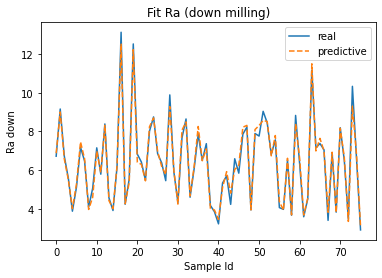

In [9]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label="real")
plt.plot(range(len(y_fit)), y_fit, label="predictive", linestyle="--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Prediction of test data**

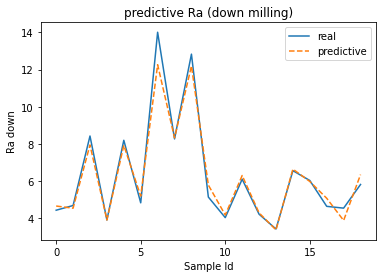

In [10]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label="real")
plt.plot(range(len(y_pred)), y_pred, label="predictive", linestyle="--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Decision Tree only using Cutting Parameters**

In [11]:
dt = DecisionTreeRegressor(random_state=20)
dt.fit(x_train, y_train)

DecisionTreeRegressor(random_state=20)

In [95]:
y_fit = dt.predict(x_train)
y_pred = dt.predict(x_test)

**Training Metrics**

In [96]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_fit))
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_fit))
print('MAE:%.2f'
      % mean_absolute_error(y_train, y_fit))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_train, y_fit))

Mean squared error: 0.00
Coefficient of determination: 1.00
MAE:0.00
mean absolute percentage error:0.00


**Testing Metrics**

In [97]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 0.26
Coefficient of determination: 0.97
MAE:0.45
mean absolute percentage error:0.08


**Fit to training data**

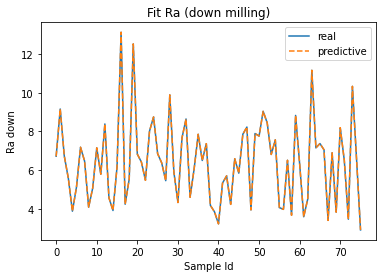

In [98]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label="real")
plt.plot(range(len(y_fit)), y_fit, label="predictive", linestyle="--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Prediction of test data**

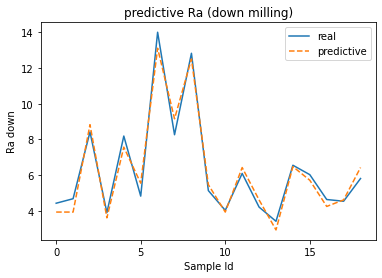

In [99]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label="real")
plt.plot(range(len(y_pred)), y_pred, label="predictive", linestyle="--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Gradient Boosting Tree only using Cutting Parameters**

In [100]:
gbr = GradientBoostingRegressor(random_state=20)
gbr.fit(x_train, y_train);

In [101]:
y_fit = gbr.predict(x_train)
y_pred = gbr.predict(x_test)

**Training Metrics**

In [102]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_fit))
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_fit))
print('MAE:%.2f'
      % mean_absolute_error(y_train, y_fit))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_train, y_fit))

Mean squared error: 0.09
Coefficient of determination: 0.98
MAE:0.24
mean absolute percentage error:0.04


**Testing Metrics**

In [103]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 0.35
Coefficient of determination: 0.96
MAE:0.41
mean absolute percentage error:0.06


**Fit to training data**

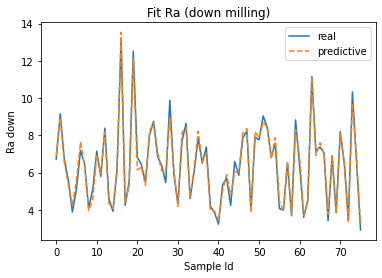

In [104]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label="real")
plt.plot(range(len(y_fit)), y_fit, label="predictive", linestyle="--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Prediction of test data**

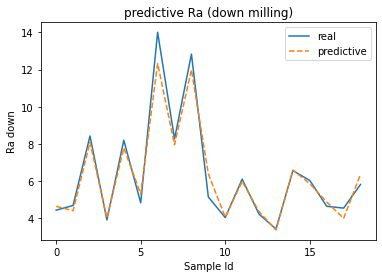

In [105]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label="real")
plt.plot(range(len(y_pred)), y_pred, label="predictive", linestyle="--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

#### Up Milling

**Random Forest only using Cutting Parameters**

In [106]:
up_or_down = 'up' # or down
all_data = pd.read_csv('../../data/feature_set1/train_{}_Y.csv'.format(up_or_down))
all_data = all_data.drop(index=[48, 49, 51, 72, 91], axis=0).reset_index(drop=True)  # remove outliers
all_data.head()

Nr.  spindle_speed   ap     fz     Ra_up   vbs   clamp_t1     clamp_t2  \
0    1           8000  0.2  0.050  12.90500   800  26.229323  1295.769854   
1    2           8000  0.2  0.065   6.78175  1040  29.329545   994.685664   
2    3           8000  0.2  0.075   8.43450  1200  22.787313  1504.542610   
3    4           8000  0.2  0.100   6.77025  1600  28.397163  2118.802554   
4    5           8000  0.4  0.050  12.54250   800  43.666667   824.102151   

    clamp_t3  clamp_t4  ...  robot_t4  robot_t5  robot_t6  robot_t7  robot_t8  \
0  44.484558     155.0  ...    1210.0     384.0  0.295203  2.858728  1.223420   
1  43.024878     128.0  ...    1221.0     454.0  0.129026  2.502421  1.249903   
2  44.924273     151.0  ...    1246.0     474.0  0.202293  2.518253  1.249318   
3  54.015627     169.0  ...    1278.0     614.0  0.179430  2.414027  1.287632   
4  52.226146     126.0  ...    1128.0     311.0  0.169912  3.404943  1.141053   

   robot_t9   clamp_f1   clamp_f2   robot_f1  robot_f2  
0  1.219488  17.582900  21.717172  51.978762  5.050505  
1  1.244343  15.763967  21.717172  45.485476  4.545455  
2  1.243240  20.080109  21.717172  63.985078  5.050505  
3  1.278015  20.092329  21.717172  84.466924  5.050505  
4  1.139565  13.043699   9.595960  32.618295  6.060606  

[5 rows x 28 columns]

##### All Features without Hyperparametertuning

In [107]:
used_feature = ['spindle_speed', 'ap', 'fz', 'vbs',]

In [108]:
X = all_data[used_feature]
X = np.array(X)
Y = all_data['Ra_{}'.format(up_or_down)]
Y = np.array(Y)
x_train, x_test , y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=20, shuffle=True)

In [109]:
rf = RandomForestRegressor(n_estimators=1000, random_state=20)
rf.fit(x_train, y_train);

In [110]:
y_fit = rf.predict(x_train)
y_pred = rf.predict(x_test)

**Training Metrics**

In [111]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_fit))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_fit))
print('MAE:%.2f'
      % mean_absolute_error(y_train, y_fit))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_train, y_fit))

Mean squared error: 0.07
Coefficient of determination: 0.98
MAE:0.20
mean absolute percentage error:0.03


**Testing Metrics**

In [112]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 0.72
Coefficient of determination: 0.91
MAE:0.70
mean absolute percentage error:0.12


**Fit to training data**

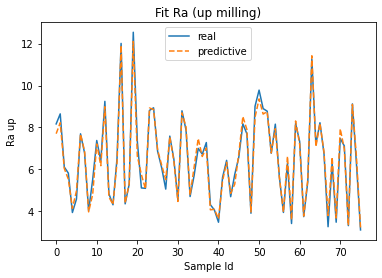

In [113]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label="real")
plt.plot(range(len(y_fit)), y_fit, label="predictive", linestyle="--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Prediction of test data**

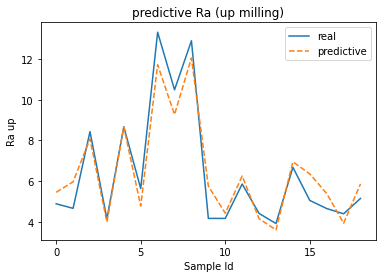

In [114]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label="real")
plt.plot(range(len(y_pred)), y_pred, label="predictive", linestyle="--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Decision Tree only using Cutting Parameters**

In [115]:
dt = DecisionTreeRegressor(random_state=20)
dt.fit(x_train, y_train);

In [116]:
y_fit = dt.predict(x_train)
y_pred = dt.predict(x_test)

**Training Metrics**

In [117]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_fit))
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_fit))
print('MAE:%.2f'
      % mean_absolute_error(y_train, y_fit))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_train, y_fit))

Mean squared error: 0.00
Coefficient of determination: 1.00
MAE:0.00
mean absolute percentage error:0.00


**Testing Metrics**

In [118]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 0.59
Coefficient of determination: 0.93
MAE:0.62
mean absolute percentage error:0.11


**Fit to training data**

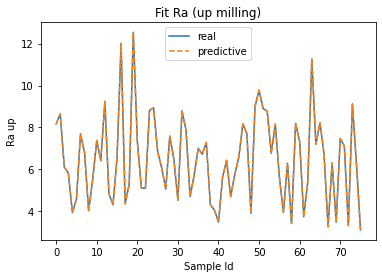

In [119]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label="real")
plt.plot(range(len(y_fit)), y_fit, label="predictive", linestyle="--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Prediction of test data**

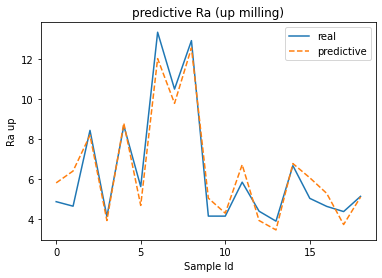

In [120]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label="real")
plt.plot(range(len(y_pred)), y_pred, label="predictive", linestyle="--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Gradient Boosting Tree only using Cutting Parameters**

In [121]:
gbr = GradientBoostingRegressor(random_state=20)
gbr.fit(x_train, y_train);

In [122]:
y_fit = gbr.predict(x_train)
y_pred = gbr.predict(x_test)

**Training Metrics**

In [123]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_fit))
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_fit))
print('MAE:%.2f'
      % mean_absolute_error(y_train, y_fit))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_train, y_fit))

Mean squared error: 0.08
Coefficient of determination: 0.98
MAE:0.20
mean absolute percentage error:0.03


**Testing Metrics**

In [124]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('MAE:%.2f'
      % mean_absolute_error(y_test, y_pred))
print('mean absolute percentage error:%.2f'
     % mean_absolute_percentage_error(y_test, y_pred))

Mean squared error: 0.78
Coefficient of determination: 0.91
MAE:0.66
mean absolute percentage error:0.11


**Fit to training data**

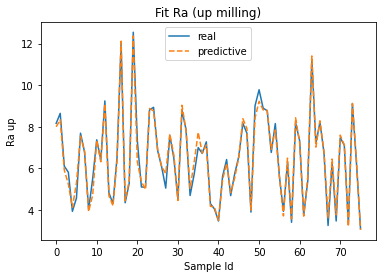

In [125]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_train)), y_train, label="real")
plt.plot(range(len(y_fit)), y_fit, label="predictive", linestyle="--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('Fit Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()

**Prediction of test data**

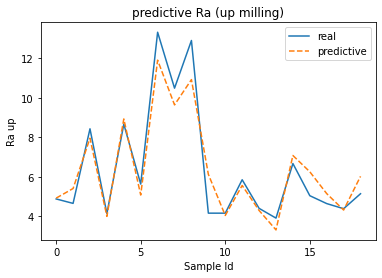

In [126]:
# Plot outputs
ax = plt.figure().gca()
ax.xaxis.get_major_locator().set_params(integer=True)

plt.plot(range(len(y_test)), y_test, label="real")
plt.plot(range(len(y_pred)), y_pred, label="predictive", linestyle="--")

plt.xlabel("Sample Id")
plt.ylabel("Ra {}".format(up_or_down))
plt.title('predictive Ra ({} milling)'.format(up_or_down))
plt.legend() 
plt.show()